In [168]:

import numpy as np
import pandas as pd


In [169]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [170]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3957,ham,So i could kiss and feel you next to me...,NaN,NaN,NaN
2684,ham,Yupz... I've oredi booked slots 4 my weekends ...,NaN,NaN,NaN
503,ham,Lolnice. I went from a fish to ..water.?,NaN,NaN,NaN
2198,ham,I'm in a movie. Call me 4 wat?,NaN,NaN,NaN
5484,ham,", , and picking them up from various points ...",NaN,NaN,NaN


In [171]:
df.shape

(5572, 5)

In [172]:
# 1..data clean
# 2.EDA(analysis)
# 3.text preprocessing
# 4.model
# 5.evaluation of model
# 6.improvement based on evaluation
# 7.website
# 8.deploy

## DATA CLEANING

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [174]:
##drop last 3 columns contains NA
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [175]:
df=df.rename(columns={"v1":"target","v2":"text"})

In [176]:
df.sample(5)

,target,text
2719,ham,Go where n buy? Juz buy when we get there lar.
368,ham,Wat uniform? In where get?
1541,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...
1340,ham,Might ax well im there.
2077,ham,Hey hun-onbus goin 2 meet him. He wants 2go ou...


In [177]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [178]:
df['target']=encoder.fit_transform(df['target'])

In [179]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [180]:
df.isnull().sum()


target    0
text      0
dtype: int64

In [181]:
df.duplicated().sum()

403

In [182]:
df=df.drop_duplicates(keep="first")

In [183]:
df.duplicated().sum()

0

In [184]:
df.shape

(5169, 2)

## 2.EDA

In [185]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [186]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [187]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

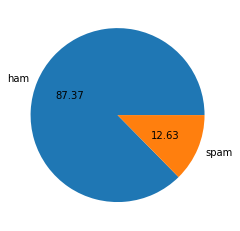

In [188]:
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show

In [189]:
# data is imbalanced(ham is too much)

In [190]:
import nltk

In [191]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [192]:
df["num_characters"]=df["text"].apply(len)

In [193]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [194]:
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [195]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [196]:
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [197]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [198]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [199]:
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [200]:
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [201]:
## spam msgs are larger

In [202]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [204]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [205]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [206]:
df['transformed_text'] = df['text'].apply(transform_text)

In [207]:
df['num_words_transform']=df['text'].apply(lambda x: len(str(x).split()))

In [208]:
import numpy as np


In [209]:
X= np.vstack((df['num_characters'],df['num_words'],df['num_sentences'])).T

In [210]:
X.shape

(5169, 3)

In [211]:
X.shape

(5169, 3)

In [212]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,num_words_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,20
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,28
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,13


In [213]:
df["text"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [214]:
y=df["target"]

In [215]:
from sklearn.linear_model import LogisticRegression


In [216]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [217]:
lr_model = LogisticRegression()

In [218]:
lr_model.fit(X_train,y_train)
lr_model.score(X_train,y_train)

0.9259975816203144

In [219]:
y_pred = lr_model.predict(X)



In [220]:
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [222]:
print("Accuracy Score =",accuracy_score(y,y_pred))
print("Precision Score =",precision_score(y,y_pred))

Accuracy Score = 0.9218417488875992
Precision Score = 0.7632135306553911


In [223]:
df['y2']=y_pred

In [224]:
df["text"][751]

'You have an important customer service announcement from PREMIER.'

In [225]:
s=df["text"][2247]

In [226]:
s

'Back 2 work 2morro half term over! Can U C me 2nite 4 some sexy passion B4 I have 2 go back? Chat NOW 09099726481 Luv DENA Calls å£1/minMobsmoreLKPOBOX177HP51FL'

In [227]:
r=(lr_model.predict([[len(s),len(nltk.word_tokenize(s)),len(nltk.sent_tokenize(s))]]))

In [228]:
r[0]

1

<function matplotlib.pyplot.show(close=None, block=None)>

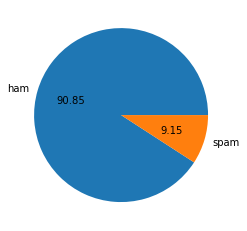

In [229]:
plt.pie(df['y2'].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show

In [230]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [231]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [232]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(lr_model,open('model1.pkl','wb'))

In [233]:
import pickle
pickle.dump(lr_model,open('model33.pkl','wb'))